In [1]:
import tensorflow as tf
print('建立起序列化物件')
tokenizer1 = tf.keras.preprocessing.text.Tokenizer(filters = '')
print('我們給予一段文字，如果沒用空格隔開請做分詞')
text1 = ['昨天 天氣 很冷','今天 白天 天氣 氣溫 回升']
tokenizer1.fit_on_texts(text1)
print('每個字對應的編碼:\n', tokenizer1.word_index)
print('編碼對應的文字:\n', tokenizer1.index_word)
print('每個字出現的文字數量:\n', tokenizer1.word_counts)
print('每個句子出現的文字數量:\n', tokenizer1.document_count)

建立起序列化物件
我們給予一段文字，如果沒用空格隔開請做分詞
每個字對應的編碼:
 {'天氣': 1, '昨天': 2, '很冷': 3, '今天': 4, '白天': 5, '氣溫': 6, '回升': 7}
編碼對應的文字:
 {1: '天氣', 2: '昨天', 3: '很冷', 4: '今天', 5: '白天', 6: '氣溫', 7: '回升'}
每個字出現的文字數量:
 OrderedDict({'昨天': 1, '天氣': 2, '很冷': 1, '今天': 1, '白天': 1, '氣溫': 1, '回升': 1})
每個句子出現的文字數量:
 2


In [2]:
print('文本資料初步神經網路操作')
print('第一部分:序列化tokenizer、調整序列長度pad_sequences')

from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
import numpy as np
texts = ["我 喜歡 學習 AI","機器 學習 針對 固定長度 文件 進行 訓練 與 預估","深度 學習 針對 不固定長度 文本 與 圖檔 進行 訓練 與 預估",
"文本 的 預先 處理 屬於 自然 語言","強化 學習 強調 人 與 環境 的 互動 與 各種 選擇","YOLO 與 人臉 辨識 可 運用 CNN 觀念 但 不是 CNN",
"Transformer 架構 提供 修正 Tensorflow 方法 可以 進行 文本 生成"]
labels = np.array([1, 1, 1, 1, 0, 0, 0])
print('如果建立序列化字串詞彙太多，另可能有些詞彙不在詞彙清單內')
tokenizer1 = Tokenizer(num_words = 1000, oov_token="<OOV>")
print('我們給予一段文字，如果沒用空格隔開請做分詞')
tokenizer1.fit_on_texts(texts)
print('每個字對應的編碼:\n', tokenizer1.word_index)
print('編碼對應的文字:\n', tokenizer1.index_word)
print('每個字出現的文字數量:\n', tokenizer1.word_counts)
print('每個句子出現的文字數量:\n', tokenizer1.document_count)
print('我們得將序列長度調整為相同長度')
sequences1 = tokenizer1.texts_to_sequences(texts)
print('文本序列:\n', sequences1)
padded_sequences1 = pad_sequences(sequences1, maxlen = 10, padding='post', truncating='post')
print('調整後文本序列:\n', padded_sequences1)

文本資料初步神經網路操作
第一部分:序列化tokenizer、調整序列長度pad_sequences
如果建立序列化字串詞彙太多，另可能有些詞彙不在詞彙清單內
我們給予一段文字，如果沒用空格隔開請做分詞
每個字對應的編碼:
 {'<OOV>': 1, '與': 2, '學習': 3, '進行': 4, '文本': 5, '針對': 6, '訓練': 7, '預估': 8, '的': 9, 'cnn': 10, '我': 11, '喜歡': 12, 'ai': 13, '機器': 14, '固定長度': 15, '文件': 16, '深度': 17, '不固定長度': 18, '圖檔': 19, '預先': 20, '處理': 21, '屬於': 22, '自然': 23, '語言': 24, '強化': 25, '強調': 26, '人': 27, '環境': 28, '互動': 29, '各種': 30, '選擇': 31, 'yolo': 32, '人臉': 33, '辨識': 34, '可': 35, '運用': 36, '觀念': 37, '但': 38, '不是': 39, 'transformer': 40, '架構': 41, '提供': 42, '修正': 43, 'tensorflow': 44, '方法': 45, '可以': 46, '生成': 47}
編碼對應的文字:
 {1: '<OOV>', 2: '與', 3: '學習', 4: '進行', 5: '文本', 6: '針對', 7: '訓練', 8: '預估', 9: '的', 10: 'cnn', 11: '我', 12: '喜歡', 13: 'ai', 14: '機器', 15: '固定長度', 16: '文件', 17: '深度', 18: '不固定長度', 19: '圖檔', 20: '預先', 21: '處理', 22: '屬於', 23: '自然', 24: '語言', 25: '強化', 26: '強調', 27: '人', 28: '環境', 29: '互動', 30: '各種', 31: '選擇', 32: 'yolo', 33: '人臉', 34: '辨識', 35: '可', 36: '運用', 37: '觀念', 38: '但', 39: '不是', 40: 't

In [3]:
from ast import mod
print('規劃神經網路模型')

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, LSTM, GRU, Dense
print('embedding參數設定')
input_dim1 = 1000
output_dim1 = 128
input_length1 = 10
print('建立神經網路模型')
model = Sequential([Embedding(input_dim = input_dim1, output_dim = output_dim1, input_length = input_length1),
        SimpleRNN(units = 4, return_sequences = True), SimpleRNN(units = 4, return_sequences = True),
        SimpleRNN(units = 4, return_sequences = True), SimpleRNN(units = 4, return_sequences = True),
        SimpleRNN(units = 4, return_sequences = True), SimpleRNN(units = 4), Dense(units = 1, activation='sigmoid')])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics = ['accuracy'])
model.summary()

規劃神經網路模型
embedding參數設定
建立神經網路模型


c:\ProgramData\anaconda3\Lib\site-packages\keras\src\layers\core\embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn (SimpleRNN)          │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_1 (SimpleRNN)        │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_2 (SimpleRNN)        │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_3 (SimpleRNN)        │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_4 (SimpleRNN)        │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_5 (SimpleRNN)        │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

進行訓練後圖表顯示
Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 9s 9s/step - accuracy: 0.4000 - loss: 0.7722 - val_accuracy: 0.5000 - val_loss: 0.7523
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step - accuracy: 0.8000 - loss: 0.5715 - val_accuracy: 0.5000 - val_loss: 0.7632
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step - accuracy: 0.8000 - loss: 0.5573 - val_accuracy: 0.5000 - val_loss: 0.7761
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step - accuracy: 0.8000 - loss: 0.5512 - val_accuracy: 0.5000 - val_loss: 0.7863
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step - accuracy: 0.8000 - loss: 0.5428 - val_accuracy: 0.5000 - val_loss: 0.7954
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step - accuracy: 0.8000 - loss: 0.5384 - val_accuracy: 0.5000 - val_loss: 0.8057
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step - accuracy: 0.8000 - loss: 0.5312 - val_accuracy: 0.5000 - val_loss: 0.8172
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step - accuracy: 0.8000 - loss: 0.5238 - val_accuracy: 0.0

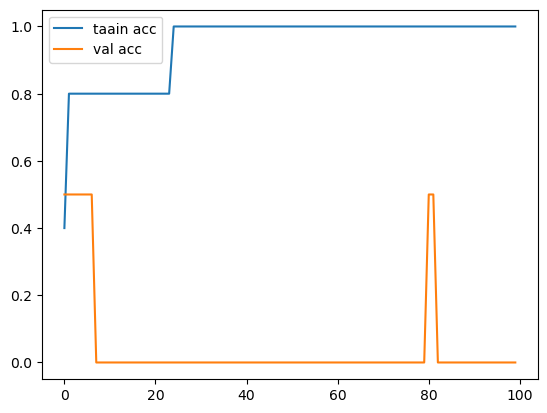

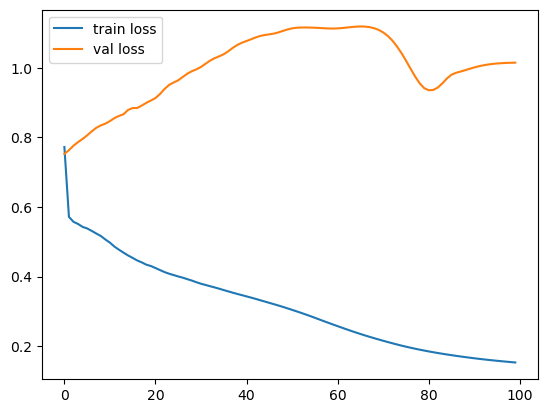

In [4]:
print('進行訓練後圖表顯示')
history = model.fit(padded_sequences1, labels, epochs = 100, validation_split = 0.2)

import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], label='taain acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.show()

In [5]:
print('模型儲存與載入')
model.save('my_model.h5')

from tensorflow.keras.models import load_model
model2 = load_model('my_model.h5')
print('準備做預測')
text2 = ["烏克蘭 被 炸毀 水庫 奇蹟 長出 森林"]
print('即將進行序列化，最好與之前操作相同')
sequences2 = tokenizer1.texts_to_sequences(text2)
print('文本序列:\n', sequences2)
padded_sequences2 = pad_sequences(sequences2, maxlen = 10, padding='post', truncating='post')
print('調整後文本序列:\n', padded_sequences2)
print('模型進行預測')
pred = model2.predict(padded_sequences2)
print('預測結果:\n', pred)

模型儲存與載入


準備做預測
即將進行序列化，最好與之前操作相同
文本序列:
 [[1, 1, 1, 1, 1, 1, 1]]
調整後文本序列:
 [[1 1 1 1 1 1 1 0 0 0]]
模型進行預測
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 731ms/step
預測結果:
 [[0.75749207]]
